In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;

In [3]:
cp = '/content/Customers.csv'
pp = '/content/Products.csv'
tp = '/content/Transactions.csv'

In [4]:
customers = pd.read_csv(cp)
products = pd.read_csv(pp)
transactions = pd.read_csv(tp)

In [5]:
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [9]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# mergig  datasets for analysis
# left join because we want to focus on transcation
transactions_customers = transactions.merge(customers, on='CustomerID', how='left')


merged_data = transactions_customers.merge(products, on='ProductID', how='left')

summary_statistics = {
    "customers": customers.describe(include='all'),
    "products": products.describe(include='all'),
    "transactions": transactions.describe(include='all'),
    "merged_data": merged_data.describe(include='all')
}

unique_counts = {
    "customers": customers.nunique(),
    "products": products.nunique(),
    "transactions": transactions.nunique(),
    "merged_data": merged_data.nunique()
}

summary_statistics, unique_counts


({'customers':        CustomerID      CustomerName         Region           SignupDate
  count         200               200            200                  200
  unique        200               200              4                  NaN
  top         C0001  Lawrence Carroll  South America                  NaN
  freq            1                 1             59                  NaN
  mean          NaN               NaN            NaN  2023-07-19 08:31:12
  min           NaN               NaN            NaN  2022-01-22 00:00:00
  25%           NaN               NaN            NaN  2022-09-26 12:00:00
  50%           NaN               NaN            NaN  2023-08-31 12:00:00
  75%           NaN               NaN            NaN  2024-04-12 12:00:00
  max           NaN               NaN            NaN  2024-12-28 00:00:00,
  'products':        ProductID            ProductName Category       Price
  count        100                    100      100  100.000000
  unique       100                

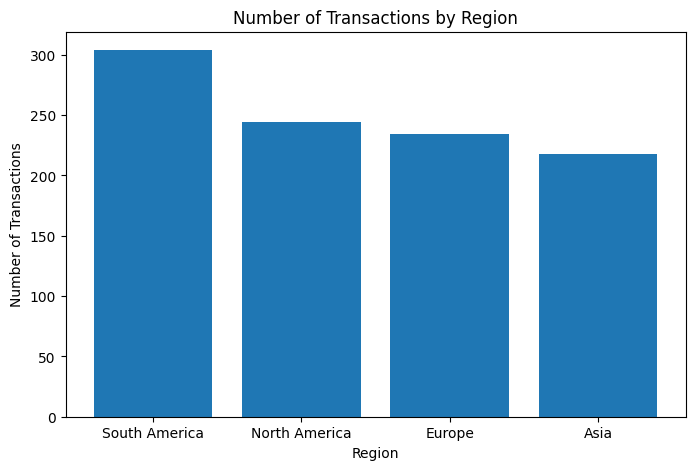

In [10]:

region_transaction_counts = merged_data['Region'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(region_transaction_counts.index, region_transaction_counts.values)
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()


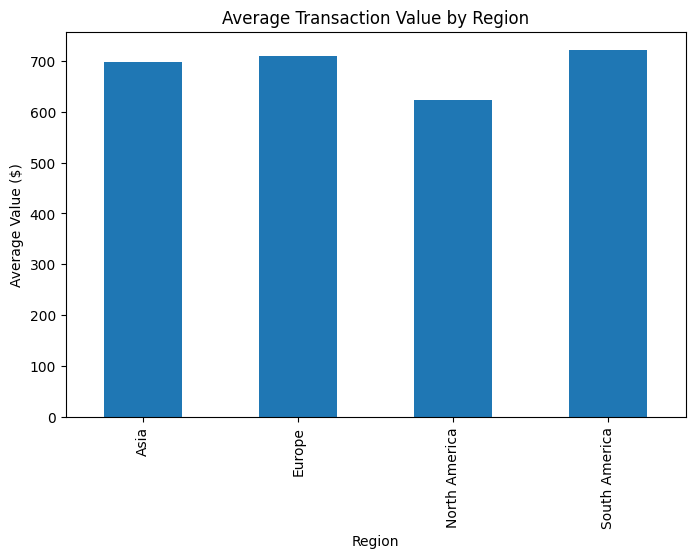

In [11]:

avg_transaction_value_region = merged_data.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
avg_transaction_value_region.plot(kind='bar', title='Average Transaction Value by Region', ylabel='Average Value ($)', xlabel='Region')
plt.show()


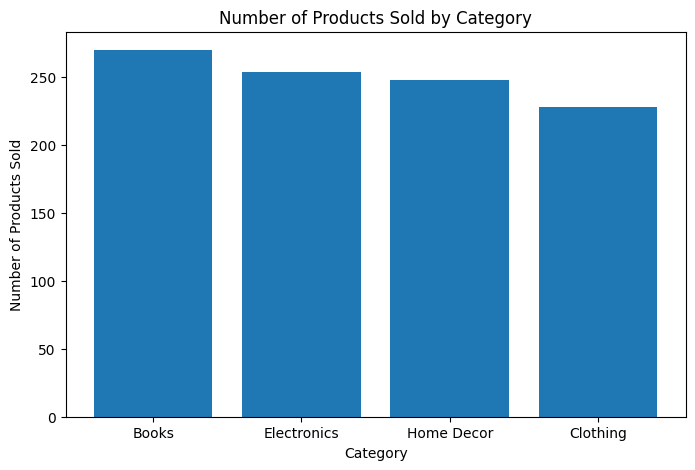

In [12]:

category_counts = merged_data['Category'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of Products Sold by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products Sold')
plt.show()


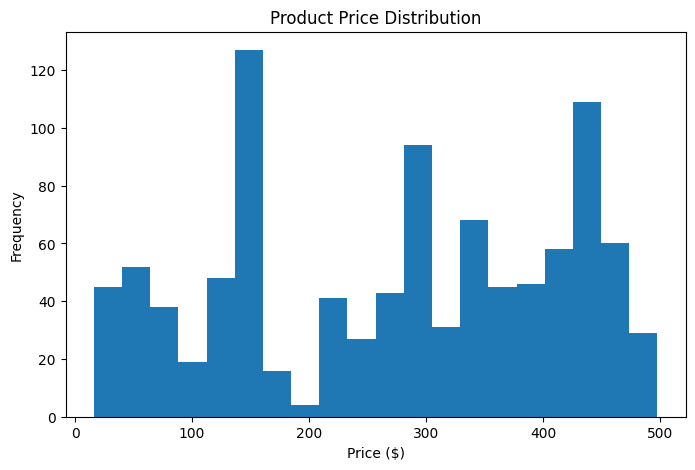

In [13]:

plt.figure(figsize=(8, 5))
merged_data['Price_y'].plot(kind='hist', bins=20, title='Product Price Distribution', xlabel='Price ($)', ylabel='Frequency')
plt.show()


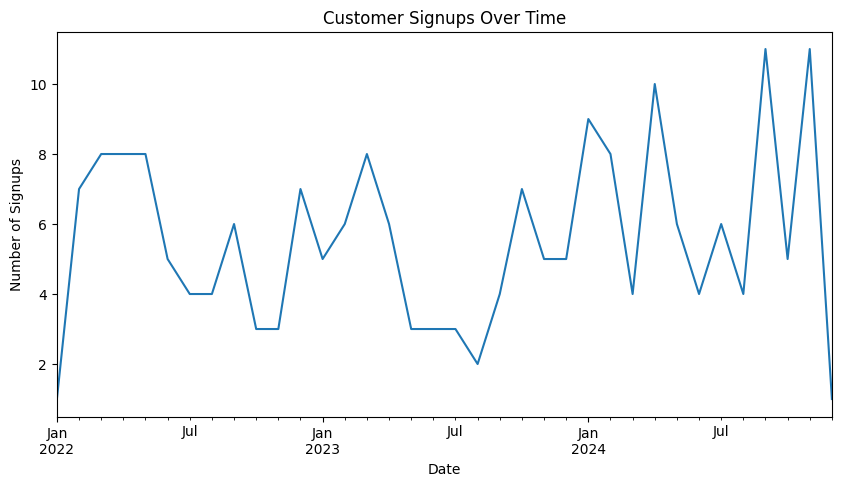

In [14]:

signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', title='Customer Signups Over Time', ylabel='Number of Signups', xlabel='Date')
plt.show()


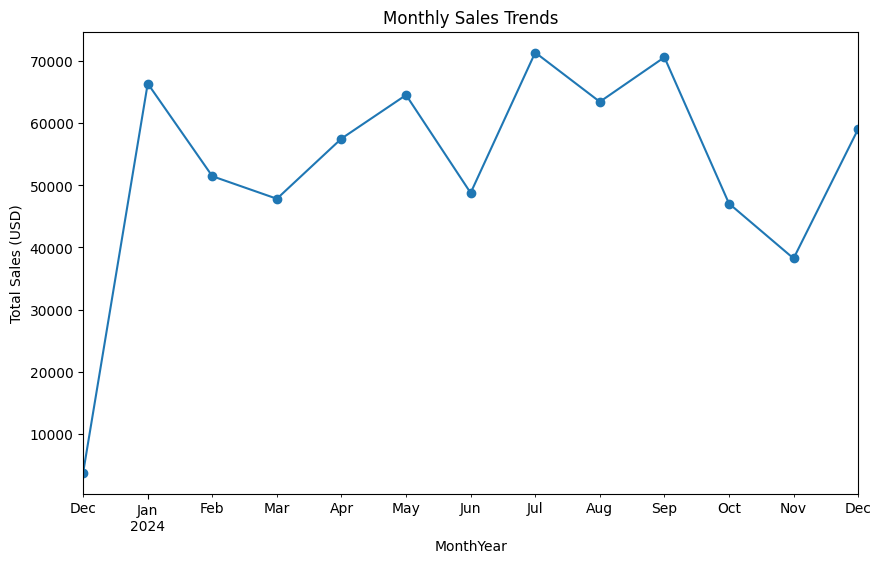

In [15]:
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
sales_by_month = merged_data.groupby('MonthYear')['TotalValue'].sum()
sales_by_month.plot(kind='line', title="Monthly Sales Trends", marker='o', figsize=(10, 6))
plt.ylabel('Total Sales (USD)')
plt.show()

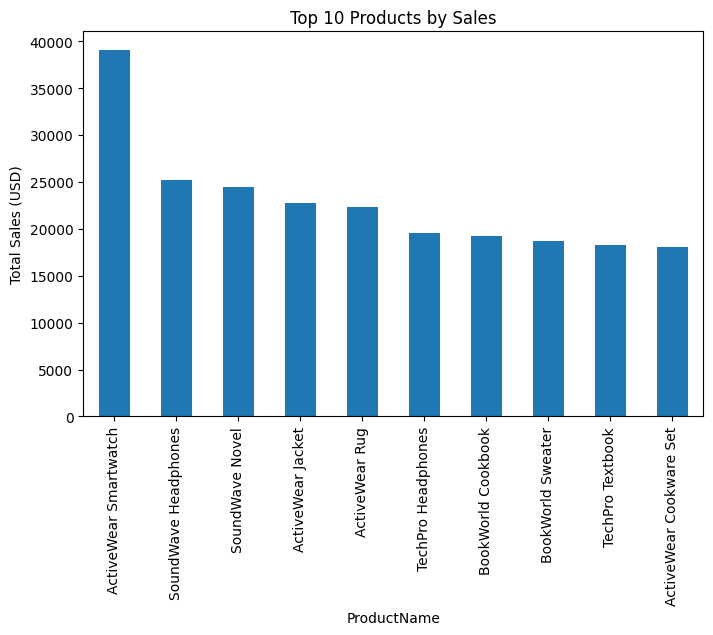

In [16]:
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title="Top 10 Products by Sales", figsize=(8, 5))
plt.ylabel('Total Sales (USD)')
plt.show()

